In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
from keras import losses
from keras import metrics
from keras.datasets import fashion_mnist


2023-03-05 17:21:13.225288: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])
     

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


2023-03-05 17:22:12.459183: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=784,
    validation_data=(x_val, y_val)
)

Epoch 1/30
77/77 [==============================] - 1s 6ms/step - loss: 20.4068 - accuracy: 0.6785 - val_loss: 6.8814 - val_accuracy: 0.7678
Epoch 2/30
77/77 [==============================] - 0s 5ms/step - loss: 5.8061 - accuracy: 0.7775 - val_loss: 4.3961 - val_accuracy: 0.7950
Epoch 3/30
77/77 [==============================] - 0s 5ms/step - loss: 4.0749 - accuracy: 0.7947 - val_loss: 3.5001 - val_accuracy: 0.8066
Epoch 4/30
77/77 [==============================] - 0s 5ms/step - loss: 2.9274 - accuracy: 0.8066 - val_loss: 2.3070 - val_accuracy: 0.8146
Epoch 5/30
77/77 [==============================] - 0s 5ms/step - loss: 2.1547 - accuracy: 0.8123 - val_loss: 1.8573 - val_accuracy: 0.8145
Epoch 6/30
77/77 [==============================] - 0s 5ms/step - loss: 1.7300 - accuracy: 0.8180 - val_loss: 1.5062 - val_accuracy: 0.8219
Epoch 7/30
77/77 [==============================] - 0s 5ms/step - loss: 1.4150 - accuracy: 0.8249 - val_loss: 1.3031 - val_accuracy: 0.8271
Epoch 8/30
77/77 [=

In [5]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.8355000019073486


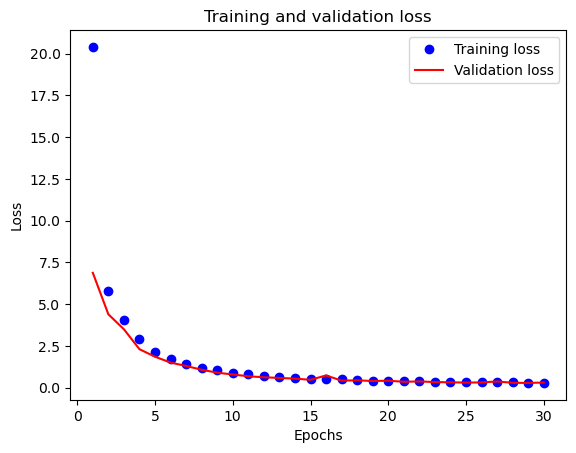

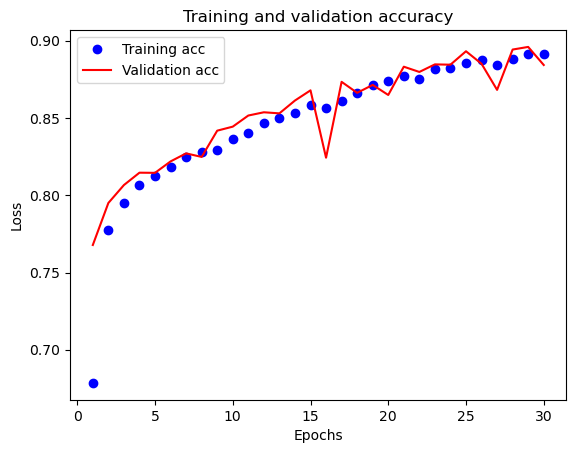

In [16]:

history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.8355
